Column names in dataset: Index(['Date', 'PM2.5 (µg/m³)', 'CO (ppm)', 'NO2 (ppb)', 'SO2 (ppb)',
       'O3 (ppb)', 'Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)'],
      dtype='object')


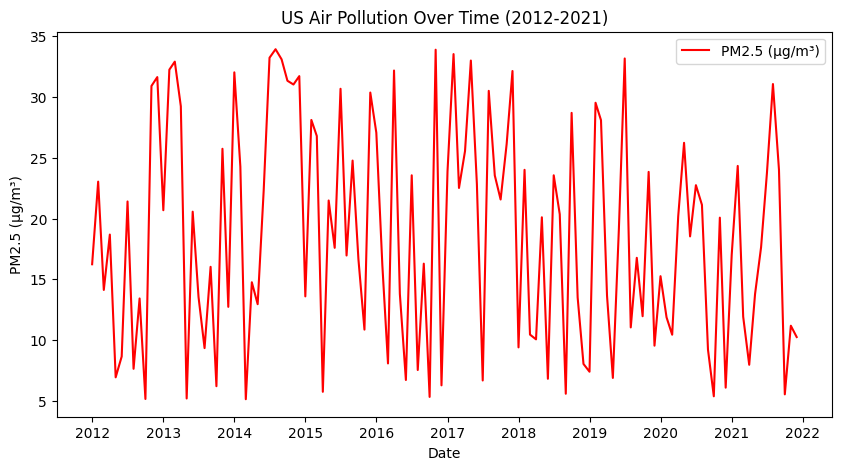

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/us_air_pollution_2012_2021_updated.csv")

# Print column names to verify
print("Column names in dataset:", df.columns)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check if 'Pollution Level' exists, otherwise use correct column name
pollution_col = "PM2.5 (µg/m³)"  # Update based on actual column name from print(df.columns)

# Filter data for Dates 2012-2021
df = df[(df['Date'].dt.year >= 2012) & (df['Date'].dt.year <= 2021)]

# Remove Outliers (Using IQR Method)
Q1 = df[pollution_col].quantile(0.25)
Q3 = df[pollution_col].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[pollution_col] >= (Q1 - 1.5 * IQR)) & (df[pollution_col] <= (Q3 + 1.5 * IQR))]

# Plot Pollution Levels Over Time
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df[pollution_col], color='red', label=pollution_col)
plt.xlabel("Date")
plt.ylabel(pollution_col)
plt.title("US Air Pollution Over Time (2012-2021)")
plt.legend()
plt.show()
